In [1]:
import warnings
import sys
import os
import pathlib
import torch 
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

warnings.filterwarnings('ignore')
sys.path.insert(0, str(pathlib.Path.cwd()/"src"))
%load_ext autoreload
%autoreload 2


In [2]:
import loaders.goes
import fields.vector_field

In [3]:
date = "2024-09-27"
band = 9

dsf = loaders.goes.discrete_scalar_field(date=date, 
                                        band = band, 
                                        start = "03:00", 
                                        end = "06:00", 
                                        extent=(-88.0, -80, 28, 34))



seconds = dsf.coord_field.T[dsf.coord_field.T.size(0)//2]
t = time.strftime("%H:%M", time.gmtime(int(seconds)))
dvf = loaders.goes.discrete_vector_field(date = date, 
                                         time = t,
                                         band = band,
                                        extent=(-88.0, -80, 28, 34))




 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/271/03/OR_ABI-L2-CMIPC-M6C09_G16_s20242710301175_e20242710303554_c20242710304059.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/271/03/OR_ABI-L2-CMIPC-M6C09_G16_s20242710306175_e20242710308553_c20242710309058.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/271/03/OR_ABI-L2-CMIPC-M6C09_G16_s20242710311175_e20242710313554_c20242710314092.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/271/03/OR_ABI-L2-CMIPC-M6C09_G16_s20242710321175_e20242710323553_c20242710324066.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/271/03/OR_ABI-L2-CMIPC-M6C09_G16_s20242710316175_e20242710318553_c20242710319046.nc
 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-CMIPC/2024/271/03/OR_ABI-L2-CMIPC

In [4]:
fig = dsf.plot(factor = 3, gif = True)
HTML(fig.to_html5_video())

In [5]:
cvf = fields.vector_field.ContinuousVectorField()
cvf.train(dsf, epochs=100, step = 8, factor = 5, size = 1600)

moved to gpu
sampling from 3710 points

--- Training block 0 ---

Block 0: product of normalized weight norms = 0.732910
Block 1: product of normalized weight norms = 0.000000
Block 2: product of normalized weight norms = 0.000000
Epoch 1/100 — Block 0 — Avg likelihood: 0.1277 — outputscale: 0.7444 — lengthscales: 1.91, 0.54, 0.54 — noise_var: 0.0909
Block 0: product of normalized weight norms = 1.325969
Block 1: product of normalized weight norms = 0.000000
Block 2: product of normalized weight norms = 0.000000
Epoch 2/100 — Block 0 — Avg likelihood: 0.1028 — outputscale: 0.7978 — lengthscales: 1.83, 0.57, 0.58 — noise_var: 0.0826
Block 0: product of normalized weight norms = 1.743014
Block 1: product of normalized weight norms = 0.000000
Block 2: product of normalized weight norms = 0.000000
Epoch 3/100 — Block 0 — Avg likelihood: 0.0585 — outputscale: 0.8516 — lengthscales: 1.75, 0.55, 0.61 — noise_var: 0.0751
Block 0: product of normalized weight norms = 1.845090
Block 1: product o

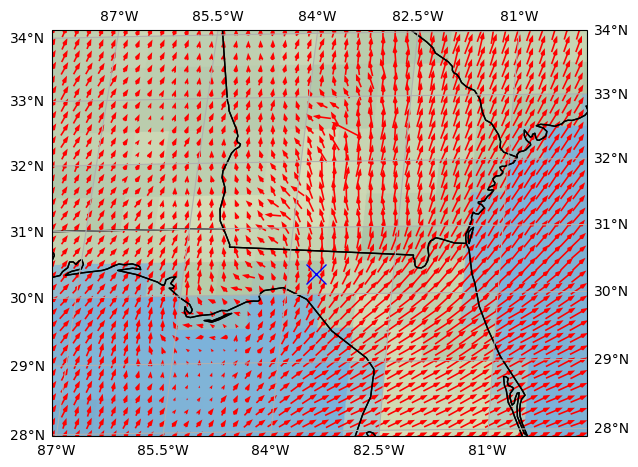

In [6]:
cvf.plot(dsf.coord_field, frame = 0, factor = 8, gif = False, scale = 8e-4)

In [65]:
fig = cvf.plot(dsf.coord_field, factor = 10, gif = True,  scale = 8e-4)
HTML(fig.to_html5_video())

In [62]:
Dt, Dx = torch.vmap(torch.func.jacrev(cvf.flow, argnums=(0, 1)), in_dims=(None, 0))(dsf.coord_field.T[0:1], dsf.coord_field.XY)

In [63]:
torch.linalg.matrix_norm(Dx,ord = 2)

tensor([0.9026, 0.9125, 0.9125,  ..., 1.1667, 1.1667, 1.1670],
       grad_fn=<AmaxBackward0>)

In [68]:
import gc 
gc.collect()
torch.cuda.empty_cache()

In [58]:
cvf.scaled_flow.rotation.a

Parameter containing:
tensor([0., 0.], requires_grad=True)